In [1]:
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, InputLayer, BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
from keras.callbacks import TensorBoard
import keras

Using TensorFlow backend.


## training params

In [2]:

batch_size = 256
epochs = 8

pool_size = (2, 2)                    # size of poolin area for max pooling
prob_drop_conv = 0.25                  # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5                # drop probability for dropout @ fc layer

## data params

In [3]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

# data params
nb_classes = len(label_dict)

## Load MNIST dataset

In [4]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = fashion_mnist.load_data()
print('X_train_raw original shape:', X_train_raw.shape)

X_train_raw original shape: (60000, 28, 28)


### Reshape Data from image matrix to array & normalize


In [5]:
if K.image_dim_ordering() == 'th':

    # Theano
    X_train = X_train_raw.reshape(X_train_raw.shape[0], 1, X_train_raw.shape[1], X_train_raw.shape[2]).astype('float32')
    X_train /= 255.

    X_test = X_test_raw.reshape(X_test_raw.shape[0], 1, X_test_raw.shape[1], X_test_raw.shape[2]).astype('float32')
    X_test /= 255.
    
    input_shape = (1, X_train_raw.shape[1], X_train_raw.shape[2])
    
else:
    
    # TensorFlow
    X_train = X_train_raw.reshape(X_train_raw.shape[0], X_train_raw.shape[1], X_train_raw.shape[2], 1).astype('float32')
    X_train /= 255.

    X_test = X_test_raw.reshape(X_test_raw.shape[0], X_test_raw.shape[1], X_test_raw.shape[2], 1).astype('float32')
    X_test /= 255.
    
    input_shape = (X_train_raw.shape[1], X_train_raw.shape[2], 1)
    
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('input_shape: ', input_shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
input_shape:  (28, 28, 1)


In [6]:
Y_train = np_utils.to_categorical(Y_train_raw)

Y_test = np_utils.to_categorical(Y_test_raw)

## Convolutional Network model

In [7]:
model = Sequential()

# input layer
model.add(InputLayer(input_shape=input_shape))

# batch normalization
model.add(BatchNormalization())

# conv1 layer
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))

# fc1 layer
# why is it 625 here??
model.add(Dense(units=250, kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(units=10, kernel_initializer='random_normal'))
model.add(Activation('softmax'))
          
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
__________

## Train

In [8]:
import time
timestamp = time.strftime("%Y%m%d-%H%m%S")
log_dir = './logs/mnist_tensorboard/' + timestamp
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_grads=True, batch_size=2*batch_size, write_images=True)

In [9]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.20, verbose=1, callbacks=[tensorboard_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 109s 2ms/step - loss: 0.7991 - acc: 0.7009 - val_loss: 0.4567 - val_acc: 0.8308
Epoch 2/8
48000/48000 [==============================] - 109s 2ms/step - loss: 0.4567 - acc: 0.8331 - val_loss: 0.3822 - val_acc: 0.8643
Epoch 3/8
48000/48000 [==============================] - 109s 2ms/step - loss: 0.3865 - acc: 0.8593 - val_loss: 0.3238 - val_acc: 0.8802
Epoch 4/8
48000/48000 [==============================] - 109s 2ms/step - loss: 0.3478 - acc: 0.8745 - val_loss: 0.3008 - val_acc: 0.8897
Epoch 5/8
48000/48000 [==============================] - 108s 2ms/step - loss: 0.3222 - acc: 0.8813 - val_loss: 0.2800 - val_acc: 0.8974
Epoch 6/8
48000/48000 [==============================] - 109s 2ms/step - loss: 0.3050 - acc: 0.8892 - val_loss: 0.2709 - val_acc: 0.8991
Epoch 7/8
48000/48000 [==============================] - 108s 2ms/step - loss: 0.2892 - acc: 0.8939 - val_loss: 0.2808 - val_acc

In [10]:
history.history

{'acc': [0.70093749999999999,
  0.833125,
  0.85933333333333328,
  0.87454166666666666,
  0.88124999999999998,
  0.88918750000000002,
  0.89389583333333333,
  0.89829166666666671],
 'loss': [0.79913396501541134,
  0.45672871184349062,
  0.38653107881546023,
  0.34780076233545937,
  0.3221922086874644,
  0.30497291398048398,
  0.28922519199053448,
  0.27610360217094421],
 'val_acc': [0.83075000047683711,
  0.86425000015894571,
  0.88024999999999998,
  0.88966666634877523,
  0.89741666650772089,
  0.89908333381017047,
  0.89866666618982949,
  0.9094166668256124],
 'val_loss': [0.45668641042709351,
  0.38215421509742736,
  0.32379930730660755,
  0.30084017403920493,
  0.28000442421436311,
  0.27086218162377673,
  0.28081694467862445,
  0.25036343904336295]}

## Evaluate

In [11]:
evaluation = model.evaluate(X_test, Y_test, batch_size=2*batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.4f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 6s 628us/step
Summary: Loss over the test dataset: 0.2670, Accuracy: 0.9006


## Predict

In [12]:
test_predictions = model.predict(X_test)
test_prediction_ids = test_predictions.argmax(axis=1)

## Plot some predictions

In [13]:
from matplotlib import pyplot as plt
import numpy as np
def plots(ims, figsize=(12,1), dpi=150, rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize, dpi=dpi)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=8)
        plt.imshow(ims[i], interpolation=None if interp else 'none', cmap='gray')

In [14]:
n_view = 10

idx = np.random.permutation(range(0,len(X_test)))[:n_view]

imgs = X_test[idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = [label_dict.get(key) for key in test_prediction_ids[idx]]

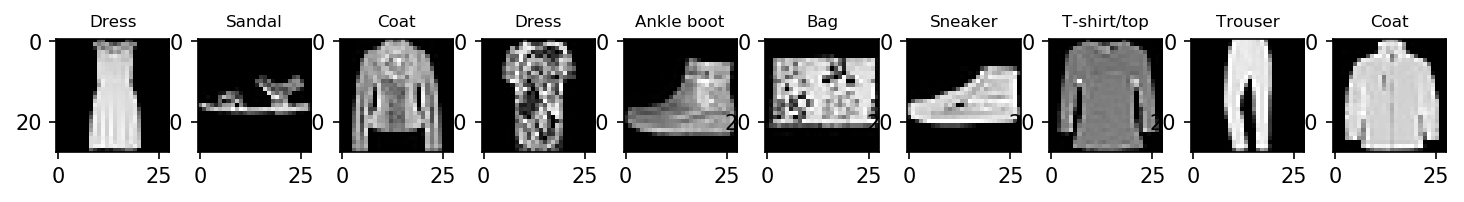

In [15]:
plots(imgs, titles=titles)
plt.show()

## Examine wrong predictions


In [16]:
# convert category vector into category label
Y_test_ids = Y_test.argmax(axis=1)

# compare the predicted and actual category labels to find error predictions
errors = np.array(Y_test_ids) - np.array(test_prediction_ids)

# gather all the wrong prediction indices
errors_idx = np.nonzero(errors)[0]

In [17]:
n_view = 10

random_idx = np.random.permutation(range(0,len(errors_idx)))[:n_view]

# grab a sampling of error indices 
random_errors_idx = errors_idx[random_idx]

# and prepare their images and labels
imgs = X_test[random_errors_idx,:].reshape(n_view, X_test_raw.shape[1], X_test_raw.shape[2])

# convert category_id to label string
prediction_titles = [label_dict.get(category_id) for category_id in test_prediction_ids[random_errors_idx]]
correct_titles = [label_dict.get(category_id) for category_id in Y_test_ids[random_errors_idx]]

# construct title string as "predicted>actual"
title_tuples = zip(prediction_titles, correct_titles)
titles = ['>'.join(t) for t in title_tuples]

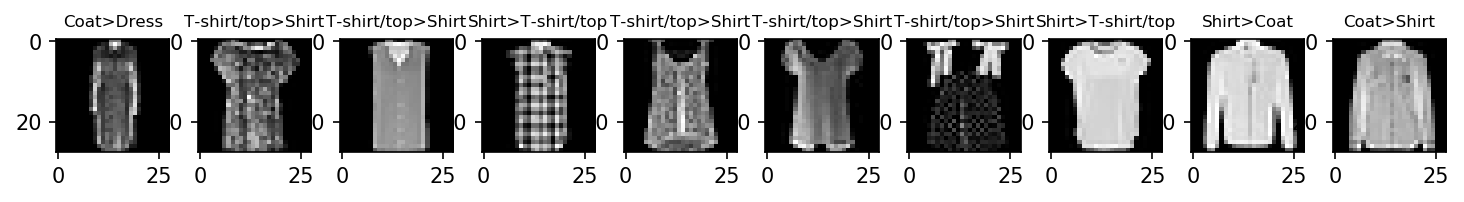

In [18]:
plots(imgs, titles=titles)
plt.show()

In [19]:
len(errors_idx) / 10000.


0.0994